In [4]:
import mlfoundry
mlfoundry.login()

Please get your API key from https://app.truefoundry.com/settings
Paste your API key and hit enter:········
Writing API key at C:\Users\pnp69\.mlfoundry\credentials.netrc


True

In [6]:
client = mlfoundry.get_client()
run = client.create_run(project_name="First-wine-quality", run_name="first-run")

[mlfoundry] 2022-06-23T21:48:41+0530 INFO project First-wine-quality does not exist. Creating First-wine-quality.
[mlfoundry] 2022-06-23T21:48:49+0530 WARNING failed to log git info because Reference at 'refs/heads/master' does not exist
[mlfoundry] 2022-06-23T21:48:52+0530 INFO Run 'pragnesh.prajapati/First-wine-quality/first-run' has started.


In [14]:
print('RUN 1 ID:', run.run_id)
print(f'You can track your runs live at https://app.truefoundry.com/mlfoundry')

RUN 1 ID: ce4b3f0e8faf4910a6e949873a093e10
You can track your runs live at https://app.truefoundry.com/mlfoundry


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#### Import data

In [8]:
data = pd.read_csv('winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<ipython-input-16-e56e73384509>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

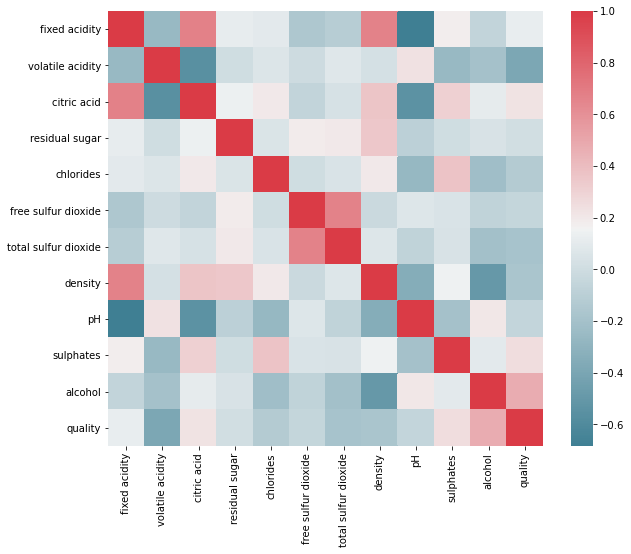

In [16]:

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<AxesSubplot:xlabel='quality', ylabel='Density'>

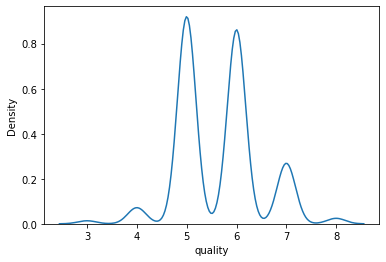

In [18]:
sns.kdeplot(data.query('quality > 2').quality)

In [19]:
# Create Classification version of target variable
data['goodquality'] = [1 if x >= 7 else 0 for x in data['quality']]# Separate feature variables and target variable
X = data.drop(['quality','goodquality'], axis = 1)
Y = data['goodquality']

In [21]:
# See proportion of good vs bad wines
data['goodquality'].value_counts()


0    1382
1     217
Name: goodquality, dtype: int64

#### Checking Feature Importanace

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.0734729  0.10060588 0.10131801 0.07608438 0.06980768 0.06840252
 0.08434844 0.08566454 0.06811745 0.10627972 0.16589848]


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [26]:
from sklearn.linear_model import LogisticRegression
# set tag in Mlfloundry
run.set_tags({'framework': 'sklearn', 'task': 'LogisticRegression'})
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
# Log a parameters in MLfloundry 
run.log_params(model.get_params())
run.log_model(model, framework=mlf.ModelFramework.SKLEARN)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

[mlfoundry] 2022-06-23T22:05:24+0530 INFO Tags set successfully


C:\Users\pnp69\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[mlfoundry] 2022-06-23T22:05:27+0530 INFO Parameters logged successfully


2022/06/23 22:06:37 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\pnp69\AppData\Local\Temp\tmp5klg1k8r\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.1.1', 'cloudpickle==1.6.0']. Set logging level to DEBUG to see the full traceback.


[mlfoundry] 2022-06-23T22:06:58+0530 INFO Model logged successfully
Accuracy Score: 0.8708333333333333


In [29]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[398  19]
 [ 43  20]]


In [28]:
metrics = {
    'Accuracy Score': accuracy_score(Y_test,Y_pred),
}
print('Tree 1 metrics:', metrics)
#Log accuracy matrix in Mlfloundry
run.log_metrics(metrics)

Tree 1 metrics: {'Accuracy Score': 0.8708333333333333}
[mlfoundry] 2022-06-23T22:06:58+0530 INFO Metrics logged successfully


In [31]:
# logging predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [32]:
run.log_dataset(
    dataset_name='train',
    features=X_train,
    predictions=y_pred_train,
    actuals=Y_train,
)

[mlfoundry] 2022-06-23T22:10:03+0530 INFO Logging Dataset, this might take a while ...
[mlfoundry] 2022-06-23T22:10:41+0530 INFO Dataset logged successfully


In [34]:
run.log_dataset(
    dataset_name='test',
    features=X_test,
    predictions=y_pred_test,
    actuals=Y_test,
)

[mlfoundry] 2022-06-23T22:14:54+0530 INFO Logging Dataset, this might take a while ...
[mlfoundry] 2022-06-23T22:15:32+0530 INFO Dataset logged successfully


In [35]:
run.end()

[mlfoundry] 2022-06-23T22:17:45+0530 INFO Shutting down background jobs and syncing data for run 'pragnesh.prajapati/First-wine-quality/first-run', please don't kill this process...
[mlfoundry] 2022-06-23T22:17:46+0530 INFO Finished syncing data for run 'pragnesh.prajapati/First-wine-quality/first-run'. Thank you for waiting!


## Run 2nd Experiment in same project 

In [36]:
run = client.create_run(project_name='First-wine-quality')
print('RUN 2 ID:', run.run_id)

[mlfoundry] 2022-06-23T22:18:28+0530 INFO No run_name given. Using a randomly generated name ivory-rook. You can pass your own using the `run_name` argument
[mlfoundry] 2022-06-23T22:18:31+0530 WARNING failed to log git info because Reference at 'refs/heads/master' does not exist
[mlfoundry] 2022-06-23T22:18:34+0530 INFO Run 'pragnesh.prajapati/First-wine-quality/ivory-rook' has started.
RUN 2 ID: abbc6b5cedde4e4e832ce4dd0adab2ff


In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
run.set_tags({'framework': 'sklearn', 'task': 'KNeighborsClassifier'})

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

[mlfoundry] 2022-06-23T22:18:46+0530 INFO Tags set successfully
Accuracy Score: 0.8729166666666667


In [38]:
run.log_params(model.get_params())
run.log_model(model, framework=mlf.ModelFramework.SKLEARN)

[mlfoundry] 2022-06-23T22:18:55+0530 INFO Parameters logged successfully


2022/06/23 22:19:14 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\pnp69\AppData\Local\Temp\tmpbvofbf38\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.1.1', 'cloudpickle==1.6.0']. Set logging level to DEBUG to see the full traceback.


[mlfoundry] 2022-06-23T22:19:36+0530 INFO Model logged successfully


In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)
metrics = {
    'Accuracy Score': accuracy_score(Y_test,Y_pred),
}
print('Tree 1 metrics:', metrics)
run.log_metrics(metrics)

Accuracy Score: 0.8708333333333333
[[398  19]
 [ 43  20]]
Tree 1 metrics: {'Accuracy Score': 0.8708333333333333}
[mlfoundry] 2022-06-23T22:20:36+0530 INFO Metrics logged successfully


In [40]:
# logging predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
run.log_dataset(
    dataset_name='train',
    features=X_train,
    predictions=y_pred_train,
    actuals=Y_train,
)
run.log_dataset(
    dataset_name='test',
    features=X_test,
    predictions=y_pred_test,
    actuals=Y_test,
)

[mlfoundry] 2022-06-23T22:20:40+0530 INFO Logging Dataset, this might take a while ...
[mlfoundry] 2022-06-23T22:21:18+0530 INFO Dataset logged successfully
[mlfoundry] 2022-06-23T22:21:18+0530 INFO Logging Dataset, this might take a while ...
[mlfoundry] 2022-06-23T22:21:56+0530 INFO Dataset logged successfully


In [41]:
run.end()

[mlfoundry] 2022-06-23T22:38:01+0530 INFO Shutting down background jobs and syncing data for run 'pragnesh.prajapati/First-wine-quality/ivory-rook', please don't kill this process...
[mlfoundry] 2022-06-23T22:38:02+0530 INFO Finished syncing data for run 'pragnesh.prajapati/First-wine-quality/ivory-rook'. Thank you for waiting!
